In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load the dataset and inspect the first few rows:

films = pd.read_csv('films_w_awards_cluster.csv')
films.head()


/var/folders/0r/l856hq9x61zf5p8g8vxjs_dh0000gn/T/ipykernel_4983/120933650.py:3: DtypeWarning: Columns (25,26,27,28,29,30,31,32,33,34,35,36,37,44,45,46,47,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  films = pd.read_csv('films_w_awards_cluster.csv')


,year_film,movie_name,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num,director,actor1,...,osc_won_category11,osc_won_category12,cannes_won_category1,cannes_won_category2,cannes_won_category3,movie_id,director_id,star_id,description,cluster
0,1894,Miss Jerry,45,5.3,204,0,0,0,Alexander Black,Blanche Bayliss,...,NaN,NaN,NaN,NaN,NaN,tt0000009,/name/nm0085156/,"/name/nm0063086/,/name/nm0183823/,/name/nm1309...",The adventures of a female reporter in the 1890s.,21
1,1903,The Passion Play,45,6.5,575,0,0,0,Lucien Nonguet,Madame Moreau,...,NaN,NaN,NaN,NaN,NaN,tt0127962,/name/nm0634629/,"/name/nm0954087/,/name/nm1166468/,/name/nm1166...",The story of Jesus Christ from the proclamatio...,21
2,1905,La malia dell'oro,0,4.0,31,0,0,0,Filoteo Alberini,NaN,...,NaN,NaN,NaN,NaN,NaN,tt0388231,/name/nm1135106/,NaN,NaN,36
3,1905,Untitled Execution Films,0,NaN,0,0,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,tt11365068,NaN,NaN,The Japanese entered China in 1900 as part of ...,36
4,1906,The Story of the Kelly Gang,70,6.0,818,0,0,0,Charles Tait,Elizabeth Tait,...,NaN,NaN,NaN,NaN,NaN,tt0000574,/name/nm0846879/,"/name/nm0846887/,/name/nm0846894/,/name/nm1431...","Story of Ned Kelly, an infamous 19th-century A...",49


In [4]:
# Check the dimensions of the dataset:
films.shape

(175481, 58)

In [5]:
#Check the data types of the columns:
films.dtypes

year_film                     int64
movie_name                   object
runtime                       int64
rating                      float64
votes                         int64
osc_nominated_num             int64
osc_won_num                   int64
cannes_won_num                int64
director                     object
actor1                       object
actor2                       object
actor3                       object
actor4                       object
genre1                       object
genre2                       object
genre3                       object
osc_nominated_category1      object
osc_nominated_category2      object
osc_nominated_category3      object
osc_nominated_category4      object
osc_nominated_category5      object
osc_nominated_category6      object
osc_nominated_category7      object
osc_nominated_category8      object
osc_nominated_category9      object
osc_nominated_category10     object
osc_nominated_category11     object
osc_nominated_category12    

In [6]:
# Check for missing values:
films.isnull().sum()

year_film                        0
movie_name                       0
runtime                          0
rating                       49617
votes                            0
osc_nominated_num                0
osc_won_num                      0
cannes_won_num                   0
director                      2090
actor1                        8806
actor2                       11347
actor3                       14561
actor4                       19390
genre1                           0
genre2                       48410
genre3                      111660
osc_nominated_category1     172811
osc_nominated_category2     174258
osc_nominated_category3     174696
osc_nominated_category4     174968
osc_nominated_category5     175179
osc_nominated_category6     175299
osc_nominated_category7     175379
osc_nominated_category8     175423
osc_nominated_category9     175446
osc_nominated_category10    175464
osc_nominated_category11    175471
osc_nominated_category12    175479
osc_nominated_catego

In [7]:
#Check the basic summary statistics of the numerical variables:
films.describe()

,year_film,runtime,rating,votes,osc_nominated_num,osc_won_num,cannes_won_num,cluster
count,175481.000000,175481.000000,125864.000000,1.754810e+05,175481.000000,175481.000000,175481.000000,175481.000000
mean,1993.326309,76.995105,5.869911,4.841687e+03,0.033685,0.008890,0.000296,27.419909
std,27.273809,44.304166,1.328926,4.126245e+04,0.355185,0.170381,0.017540,15.762411
min,1894.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,63.000000,5.100000,0.000000e+00,0.000000,0.000000,0.000000,15.000000
50%,2004.000000,88.000000,6.000000,3.900000e+01,0.000000,0.000000,0.000000,28.000000
75%,2016.000000,100.000000,6.800000,3.310000e+02,0.000000,0.000000,0.000000,41.000000
max,2023.000000,999.000000,10.000000,2.675531e+06,22.000000,12.000000,2.000000,53.000000


array([[<AxesSubplot:title={'center':'year_film'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'rating'}>],
       [<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'osc_nominated_num'}>,
        <AxesSubplot:title={'center':'osc_won_num'}>],
       [<AxesSubplot:title={'center':'cannes_won_num'}>,
        <AxesSubplot:title={'center':'cluster'}>, <AxesSubplot:>]],
      dtype=object)

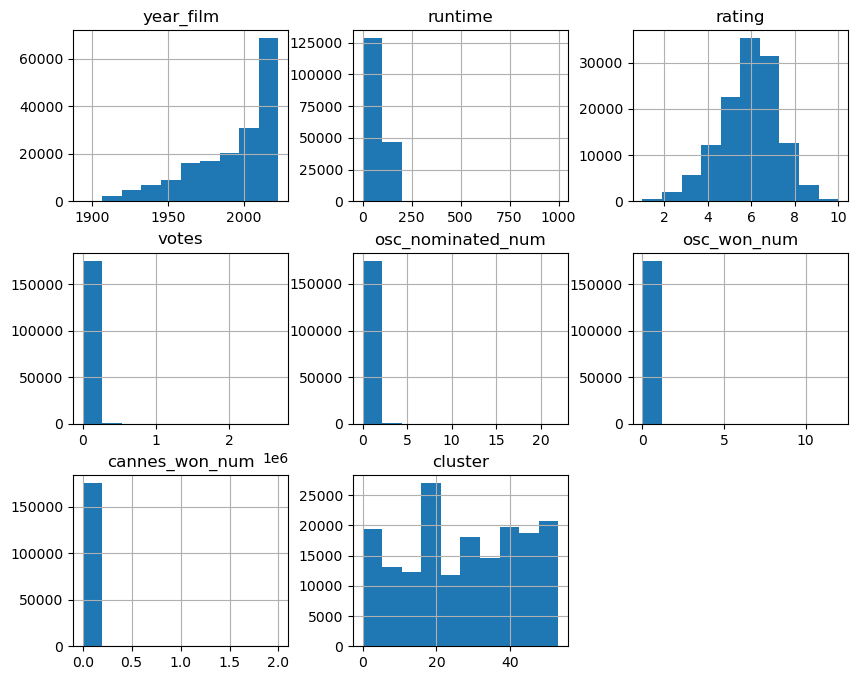

In [8]:
# Check the distribution of numerical variables using histograms:
films.hist(bins=10, figsize=(10,8))

In [ ]:
# We can take few outputs from this exploration:
# - The bigger part in the dataset are films from las 20 years.
# - Most of films are shorter of 2 hours.
# - Most of the films rated are around 6.
# - Most of films didn't receive any votes

<AxesSubplot:>

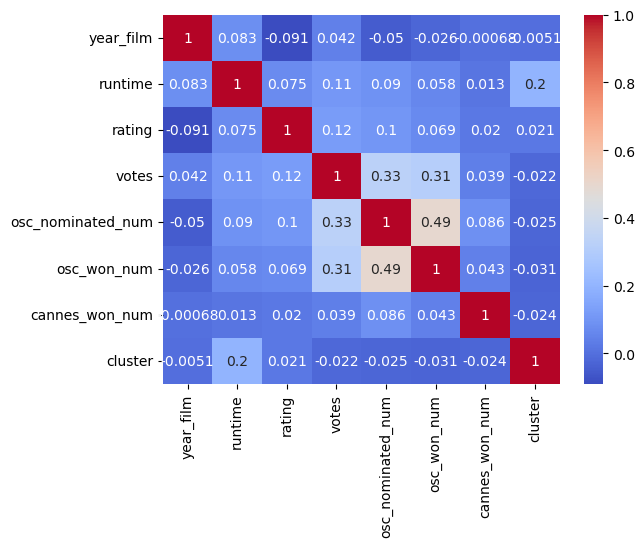

In [30]:
# Check the correlation between numerical variables using a correlation matrix and heatmap:
corr = films.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)


In [31]:
# Outputs from correlations:
# - Is there an small correlation between films nominated and won oscars with the votes the film have received
# Let's check it

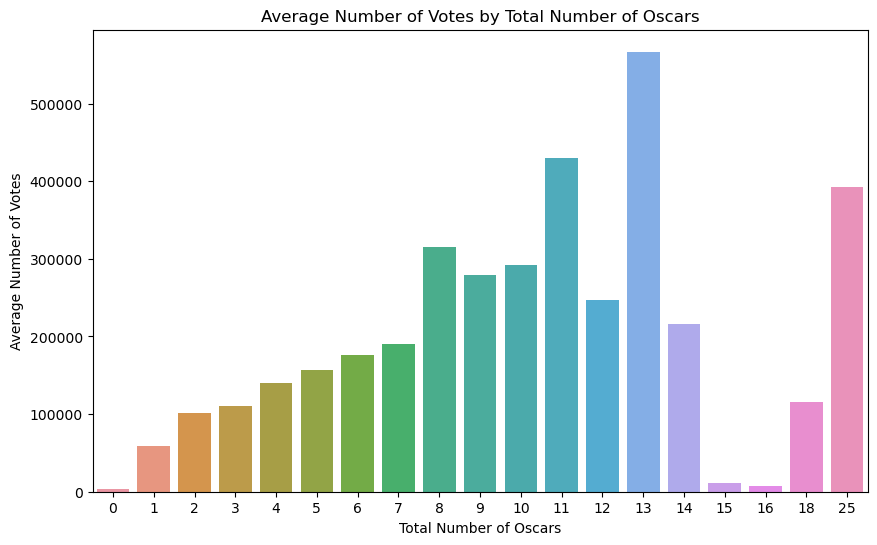

In [37]:
# Create a new column that sums the osc_nominated_num and osc_won_num columns
films['oscars_total'] = films['osc_nominated_num'] + films['osc_won_num']

# Calculate the average number of votes for each value of oscars_total
oscars_votes = films.groupby('oscars_total')['votes'].mean().reset_index()

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot using Seaborn
sns.barplot(x='oscars_total', y='votes', data=oscars_votes)

# Set the title and labels for the plot
plt.title('Average Number of Votes by Total Number of Oscars')
plt.xlabel('Total Number of Oscars')
plt.ylabel('Average Number of Votes')

# Display the plot
plt.show()



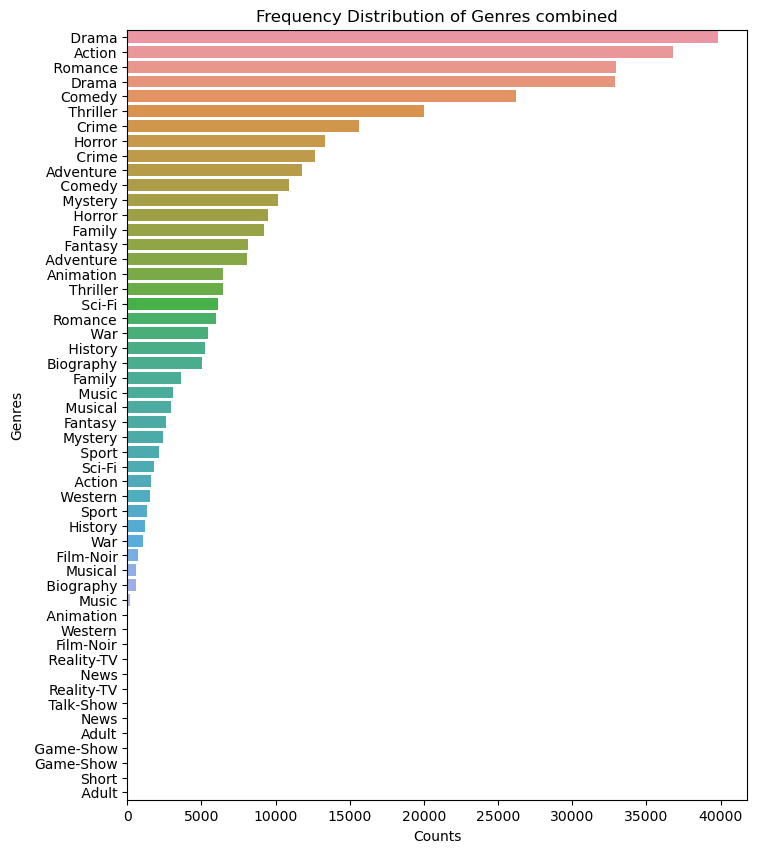

In [33]:
# Combine the three genre columns into a single Series
genres = pd.concat([films['genre1'], films['genre2'], films['genre3']])

# Create a pandas Series of the combined genres and count their frequencies
genre_counts = genres.value_counts()

# Set the size of the figure
plt.figure(figsize=(8,10))

# Create a horizontal bar plot using Seaborn
sns.barplot(x=genre_counts.values, y=genre_counts.index, orient='h')

# Set the title and labels for the plot
plt.title('Frequency Distribution of Genres combined')
plt.xlabel('Counts')
plt.ylabel('Genres')

# Display the plot
plt.show()



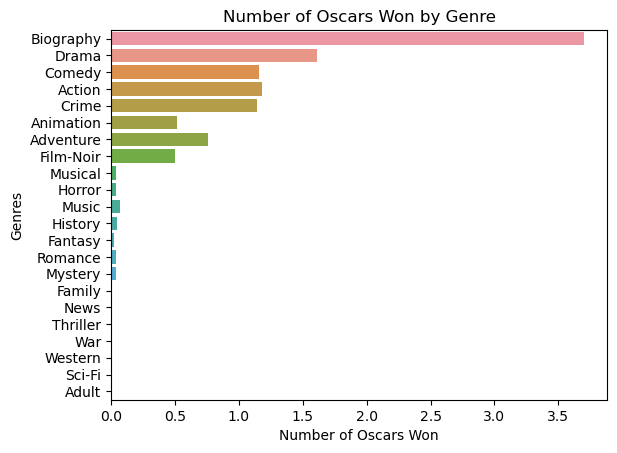

In [23]:
# Create a pivot table that aggregates the osc_won_num column by the genre columns
genre_oscars = films.pivot_table(index=['genre1', 'genre2', 'genre3'], values='osc_won_num', aggfunc='sum')

# Reset the index of the pivot table
genre_oscars = genre_oscars.reset_index()

# Sort the pivot table by the osc_won_num column in descending order
genre_oscars = genre_oscars.sort_values(by='osc_won_num', ascending=False)

# Create a horizontal bar plot using Seaborn
sns.barplot(x='osc_won_num', y='genre1', data=genre_oscars, orient='h', ci=None)

# Set the title and labels for the plot
plt.title('Number of Oscars Won by Genre')
plt.xlabel('Number of Oscars Won')
plt.ylabel('Genres')

# Display the plot
plt.show()



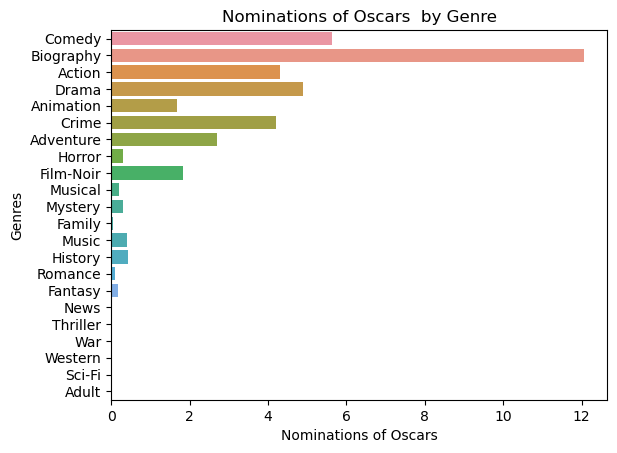

In [27]:
# Create a pivot table that aggregates the osc_won_num column by the genre columns
genre_nom_oscars = films.pivot_table(index=['genre1', 'genre2', 'genre3'], values='osc_nominated_num', aggfunc='sum')

# Reset the index of the pivot table
genre_nom_oscars = genre_nom_oscars.reset_index()

# Sort the pivot table by the osc_won_num column in descending order
genre_nom_oscars = genre_nom_oscars.sort_values(by='osc_nominated_num', ascending=False)

# Create a horizontal bar plot using Seaborn
sns.barplot(x='osc_nominated_num', y='genre1', data=genre_nom_oscars, orient='h', ci=None)

# Set the title and labels for the plot
plt.title('Nominations of Oscars  by Genre')
plt.xlabel('Nominations of Oscars')
plt.ylabel('Genres')

# Display the plot
plt.show()


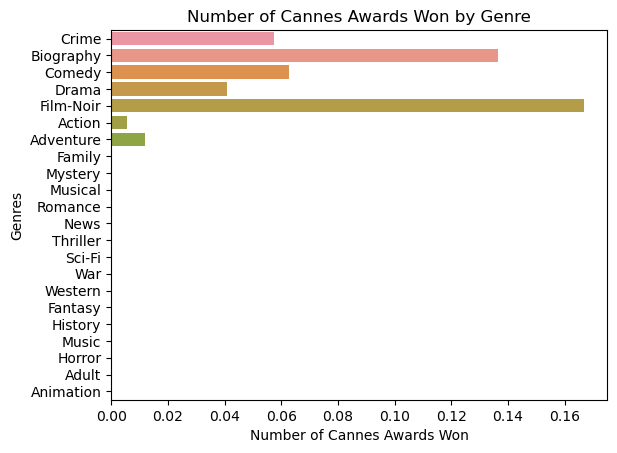

In [29]:
# Create a pivot table that aggregates the osc_won_num column by the genre columns
genre_cannes = films.pivot_table(index=['genre1', 'genre2', 'genre3'], values='cannes_won_num', aggfunc='sum')

# Reset the index of the pivot table
genre_cannes = genre_cannes.reset_index()

# Sort the pivot table by the osc_won_num column in descending order
genre_cannes = genre_cannes.sort_values(by='cannes_won_num', ascending=False)

# Create a horizontal bar plot using Seaborn
sns.barplot(x='cannes_won_num', y='genre1', data=genre_cannes, orient='h', ci=None)

# Set the title and labels for the plot
plt.title('Number of Cannes Awards Won by Genre')
plt.xlabel('Number of Cannes Awards Won')
plt.ylabel('Genres')

# Display the plot
plt.show()

<AxesSubplot:xlabel='runtime'>

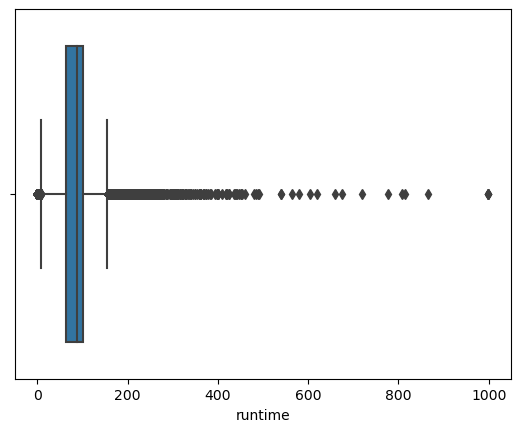

In [17]:
# Check for outliers using boxplots:
sns.boxplot(x='runtime', data=films)